# DATA CLEANING AND DATA REDUCTION<a name="top"></a>
(based on a Case Study by L.Torgo)

**Data cleaning** is an essential (but not overly exciting) part of the analytical process. In this notebook, we show how such a task could be accomplished using the *Algae Blooms Dataset*, which we will revisit in notebooks DS 03 and DS 07.  

We will also show how to run a **Principal Component Analysis** and a **Feature Selection** on this dataset. 

---

### OUTLINE
- [Problem Description](#desc)
- [Loading the Data](#load)
- [Data Cleaning](#clean)
- [Data Reduction and Feature Selection](#redux)
- [Exercises](#exer)

---
[Back to top](#top)
## PROBLEM DESCRIPTION <a name="load"></a>
The ability to monitor and perform early forecasts of various river algae blooms is crucial to  control the ecological harm they can cause.   

The dataset which is used to train the learning model consists of:
- chemical properties of various water samples of European rivers
- the quantity of seven algae in each of the samples, and 
- the characteristics of the collection process for each sample.  

For now, we assume that we have already explored the data (see notebooks DS 03 and DS 07).  

---
[Back to top](#top)
## LOADING THE DATA <a name="load"></a>
Before we can take a look at the data and begin the process in earnest, we need to load it in the in the R workspace.

The dataset is stored in the CSV file `algae_blooms.csv` (in the `Data` directory).



In [1]:
algae_blooms<-read.csv("Data/algae_blooms.csv", sep=",", header=TRUE)

We can get an idea of the data frame's structure by calling the `str` function.  

In [2]:
str(algae_blooms)

'data.frame':	340 obs. of  18 variables:
 $ season: Factor w/ 4 levels "autumn","spring",..: 4 2 1 2 1 4 3 1 4 4 ...
 $ size  : Factor w/ 3 levels "large","medium",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ speed : Factor w/ 3 levels "high","low","medium": 3 3 3 3 3 1 1 1 3 1 ...
 $ mxPH  : num  8 8.35 8.1 8.07 8.06 8.25 8.15 8.05 8.7 7.93 ...
 $ mnO2  : num  9.8 8 11.4 4.8 9 13.1 10.3 10.6 3.4 9.9 ...
 $ Cl    : num  60.8 57.8 40 77.4 55.4 ...
 $ NO3   : num  6.24 1.29 5.33 2.3 10.42 ...
 $ NH4   : num  578 370 346.7 98.2 233.7 ...
 $ oPO4  : num  105 428.8 125.7 61.2 58.2 ...
 $ PO4   : num  170 558.8 187.1 138.7 97.6 ...
 $ Chla  : num  50 1.3 15.6 1.4 10.5 ...
 $ a1    : num  0 1.4 3.3 3.1 9.2 15.1 2.4 18.2 25.4 17 ...
 $ a2    : num  0 7.6 53.6 41 2.9 14.6 1.2 1.6 5.4 0 ...
 $ a3    : num  0 4.8 1.9 18.9 7.5 1.4 3.2 0 2.5 0 ...
 $ a4    : num  0 1.9 0 0 0 0 3.9 0 0 2.9 ...
 $ a5    : num  34.2 6.7 0 1.4 7.5 22.5 5.8 5.5 0 0 ...
 $ a6    : num  8.3 0 0 0 4.1 12.6 6.8 8.7 0 0 ...
 $ a7    : num

Evidently, `algae_blooms` is a data frame with 340 observations of 18 variables each. 

**Notes:**
- 3 of the fields are categorical (`season`, `size`, `speed`, which refer to the data collection process)
- of the numerical fields, 8 have names that sound vaguely "chemical"
- presumably, the remaining fields refer to the algae blooms

We can get a better feel for the data frame by observing it in its natural habitat, so to speak, using the `head` or `tail` functions.  

In [3]:
head(algae_blooms)

season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
winter,small,medium,8.00,9.8,60.800,6.238,578.000,105.000,170.000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
spring,small,medium,8.35,8.0,57.750,1.288,370.000,428.750,558.750,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
autumn,small,medium,8.10,11.4,40.020,5.330,346.667,125.667,187.057,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
spring,small,medium,8.07,4.8,77.364,2.302,98.182,61.182,138.700,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
autumn,small,medium,8.06,9.0,55.350,10.416,233.700,58.222,97.580,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0
winter,small,high,8.25,13.1,65.750,9.248,430.000,18.250,56.667,28.4,15.1,14.6,1.4,0.0,22.5,12.6,2.9


---
[Back to top](#top)
## DATA CLEANING<a name="clean"></a>

We found some anomalies in the data when we explored the dataset (see notebooks DS 03 and DS 07); let's take some time to clean it up (somewhat). 

Anomalies come in various flavours; in this section we'll handle **missing values** (outlying behaviour is tackled in notebook DS 07).

In [4]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



The function `complete.cases` lists the observations for which every field is present (note that it says nothing about the **validity** of the case).

In [5]:
table(complete.cases(algae_blooms))


FALSE  TRUE 
   34   306 

The vast majority of observations do not have missing cases, but a few still do. Let's take a look at them to see if there is anything special about them? Are the values missing completely at random?

In [6]:
str(filter(algae_blooms, !complete.cases(algae_blooms)))
summary(filter(algae_blooms, !complete.cases(algae_blooms)))

'data.frame':	34 obs. of  18 variables:
 $ season: Factor w/ 4 levels "autumn","spring",..: 1 2 4 4 2 1 2 3 1 2 ...
 $ size  : Factor w/ 3 levels "large","medium",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ speed : Factor w/ 3 levels "high","low","medium": 1 1 2 1 3 3 1 1 3 3 ...
 $ mxPH  : num  6.8 8 NA 6.6 5.6 5.7 6.6 6.6 6.6 6.5 ...
 $ mnO2  : num  11.1 NA 12.6 10.8 11.8 10.8 9.5 10.8 11.3 10.4 ...
 $ Cl    : num  9 1.45 9 NA NA NA NA NA NA NA ...
 $ NO3   : num  0.63 0.81 0.23 3.25 2.22 ...
 $ NH4   : num  20 10 10 10 5 10 20 10 10 10 ...
 $ oPO4  : num  4 2.5 5 1 1 1 1 2 1 2 ...
 $ PO4   : num  NA 3 6 6.5 1 4 6 11 6 14 ...
 $ Chla  : num  2.7 0.3 1.1 NA NA NA NA NA NA NA ...
 $ a1    : num  30.3 75.8 35.5 24.3 82.7 16.8 46.8 46.9 47.1 66.9 ...
 $ a2    : num  1.9 0 0 0 0 4.6 0 0 0 0 ...
 $ a3    : num  0 0 0 0 0 3.9 0 0 0 0 ...
 $ a4    : num  0 0 0 0 0 11.5 28.8 13.4 0 0 ...
 $ a5    : num  2.1 0 0 0 0 0 0 0 0 0 ...
 $ a6    : num  1.4 0 0 0 0 0 0 0 1.2 0 ...
 $ a7    : num  2.1 0 0 0 0 0 0 0

    season       size       speed         mxPH            mnO2       
 autumn: 8   large : 7   high  :17   Min.   :5.600   Min.   : 5.700  
 spring: 7   medium: 1   low   : 4   1st Qu.:6.600   1st Qu.: 9.275  
 summer: 6   small :26   medium:13   Median :7.225   Median :10.800  
 winter:13                           Mean   :7.344   Mean   :10.192  
                                     3rd Qu.:8.000   3rd Qu.:11.300  
                                     Max.   :9.700   Max.   :12.600  
                                     NA's   :2       NA's   :2       
       Cl              NO3               NH4              oPO4        
 Min.   : 0.222   Min.   : 0.2300   Min.   :  5.00   Min.   :  1.000  
 1st Qu.: 4.562   1st Qu.: 0.8025   1st Qu.: 10.00   1st Qu.:  1.000  
 Median : 9.027   Median : 1.4440   Median : 11.84   Median :  3.667  
 Mean   :19.312   Mean   : 2.1684   Mean   : 62.03   Mean   : 25.676  
 3rd Qu.:25.238   3rd Qu.: 2.5725   3rd Qu.: 46.38   3rd Qu.: 20.250  
 Max.   :71.00

Right off the bat, missing cases seem to be over-represented in `small` rivers and under-represented in `low`-speed rivers. But upon further investigation (that is, comparing with the original dataset), the under-representation of `low`-speed rivers is not problematic as it is in-line with the numbers in the larger dataset (by which I mean that `low`-speed rivers don't seem to have a systematic missing value problem, rather than the under-representation of `low`-speed rivers in the original dataset is not problematic).

I will assume for now (in the interest of efficiency) that the fact that small rivers have a lot of missing cases (mostly `Cl` and `Chla`) is also not a problem (YOU SHOULD PROBABLY VERIFY IF THAT IS INDEED THE CASE...)

And the bulk of the missing values seem to come from either `Cl`, `Chla`, or `PO4`. There also seems to be 2 observations for which we have very little information, but we can't use that smmary to determine if it's always the same two observations.

For instance, let's see what observations have missing `NH4` values. 

In [7]:
algae_blooms[which(is.na(algae_blooms$NH4)),]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
62,summer,small,medium,6.4,NA,NA,NA,NA,NA,14,NA,19.4,0.0,0.0,2,0,3.9,1.7
199,winter,large,medium,8.0,7.6,NA,NA,NA,NA,NA,NA,0.0,12.5,3.7,1,0,0.0,4.9


While these observations also have missing values in other fields, they do have some non-missing fields as well. 

But they're both missing 6 of the predictor variables. How useful could they be in training a predictive model? (that depends on the model, of course....)

We can write a function that will compute how many missing cases there are for each observation. 

In [8]:
table(apply(algae_blooms[,1:11],1, function(x) sum(is.na(x)))) # 1 for rows, 2 for columns


  0   1   2   6 
306  20  12   2 

In [9]:
which(apply(algae_blooms[,1:11],1, function(x) sum(is.na(x)))>2)

[1]  62 199

Most observations have no missing cases, which is great, and there are a few with 1 or 2, but observations 62 and 199 are **wild cards**, with 6 missing predictors (out of 11). 

Based on the small number of such wild cards, we elect to remove them from the analysis. 

**IMPORTANT NOTES:**
- If you decide to remove observations for any reason whatsoever, you need to document the process that lead you to eliminate it, and make that available.
- Why do we remove the ones with 6 missing cases, but not the ones with 2 missing cases? If there'd been observations with 4 missing cases, what would you have done? What factors influence your decision? 

---
Our new dataset still contains observations with missing cases, however. 

In [10]:
algae_blooms.sna = algae_blooms[-which(apply(algae_blooms[,1:11],1, function(x) sum(is.na(x)))>2),]
dim(algae_blooms.sna)

[1] 338  18

What can we do with the other observations for which values are missing?

One possibility is to use the set of complete observations to compute a **correlation matrix**, and to see if any numerical field is strongly correlated with annother field. That way, if there is a missing value in the first field, the second could be used to impute it.

**IMPORTANT NOTE:**
- this approach only works for variables that are linearly correlated to a single other variable. Non-linear correlations and multi-variate associations will not be uncovered. 

In [11]:
symnum(cor(algae_blooms.sna[,4:18], use="complete.obs"))

     mP mO Cl NO NH o P Ch a1 a2 a3 a4 a5 a6 a7
mxPH 1                                         
mnO2    1                                      
Cl         1                                   
NO3           1                                
NH4           .  1                             
oPO4             .  1                          
PO4     .  .     .  * 1                        
Chla .                  1                      
a1         .        . .    1                   
a2                            1                
a3                               1             
a4      .        .  . .             1          
a5                                     1       
a6            .                        .  1    
a7                                           1 
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1

This might be a bit hard to read. We can use the `corrplot` library to visualize the (linear) correlations. 

In [12]:
library(corrplot)

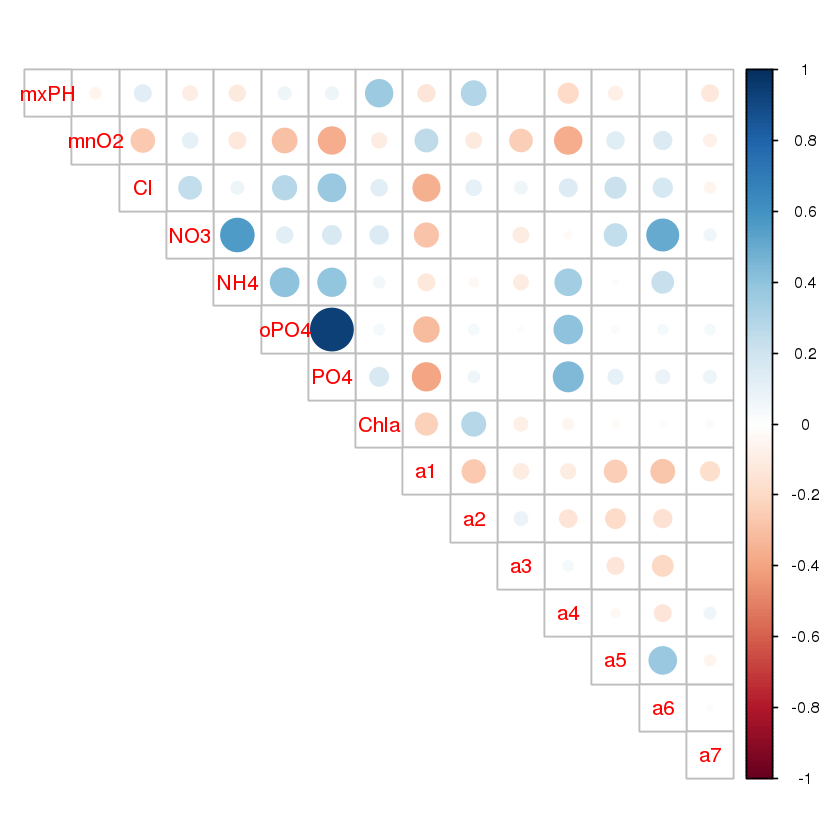

In [13]:
corrplot(cor(algae_blooms.sna[,4:18], use="complete.obs"),type="upper",tl.pos="d")

The correlation between `PO4` (which has missing cases) and `oPO4` (which does not, anymore) is clear. 

What is the nature of the relation? We'll use the set of complete cases to find it.

In [14]:
algae_blooms.nona <- algae_blooms.sna[-which(apply(algae_blooms.sna,1, function(x) sum(is.na(x)))>0),]

In [15]:
dim(algae_blooms.nona)

[1] 306  18

In [16]:
PO4.oPO4.model = lm(PO4 ~ oPO4, data=algae_blooms.nona)
PO4.oPO4.model


Call:
lm(formula = PO4 ~ oPO4, data = algae_blooms.nona)

Coefficients:
(Intercept)         oPO4  
     51.811        1.203  


The regression function is `PO4`$=51.811+1.203$`oPO4`. (note that I'm not really interested in the fit statistics)

In [17]:
Intercept = PO4.oPO4.model$coefficients[[1]]
Slope = PO4.oPO4.model$coefficients[[2]]

What are the observations for which `PO4` is missing? 

In [18]:
which(is.na(algae_blooms.sna$PO4)==TRUE)

[1]  28 221 291 326 331 335

Let's use the regression function to impute the missing `PO4` values.

In [19]:
algae_blooms.sna2 <- algae_blooms.sna
algae_blooms.sna2$PO4 <- ifelse(is.na(algae_blooms.sna2$PO4),max(Intercept + Slope*algae_blooms.sna2$oPO4,0),algae_blooms.sna2$PO4)

We can clearly see that no values of `PO4` are missing anymore.

In [20]:
which(is.na(algae_blooms.sna2$PO4)==TRUE)

integer(0)

That takes care of the missing values with strong linear correlation to another field. Where do we stand now?

In [21]:
summary(algae_blooms.sna2)

    season       size        speed          mxPH            mnO2       
 autumn:80   large : 82   high  :142   Min.   :5.600   Min.   : 1.500  
 spring:84   medium:136   low   : 58   1st Qu.:7.750   1st Qu.: 8.000  
 summer:85   small :120   medium:138   Median :8.055   Median : 9.700  
 winter:89                             Mean   :8.002   Mean   : 9.161  
                                       3rd Qu.:8.400   3rd Qu.:10.800  
                                       Max.   :9.700   Max.   :13.400  
                                       NA's   :2       NA's   :1       
       Cl               NO3              NH4                oPO4        
 Min.   :  0.222   Min.   : 0.000   Min.   :    5.00   Min.   :   1.00  
 1st Qu.: 10.994   1st Qu.: 1.147   1st Qu.:   37.86   1st Qu.:  13.00  
 Median : 32.470   Median : 2.356   Median :  107.36   Median :  37.24  
 Mean   : 42.517   Mean   : 3.121   Mean   :  471.73   Mean   :  73.09  
 3rd Qu.: 57.750   3rd Qu.: 4.147   3rd Qu.:  244.90   3rd 

Alright, so we don't have as many missing values as before, but we still have some. And the correlation trick isn't going to work this time. 

What can we do? There are many ways to tackle the problem, but we will use $k$NN imputation. The principle is simple. Using some similarity/distance metric (typically based on the Euclidean distance between points), we start by identifying the $k$ nearest (complete) neighbours of each observation with a missing case. We then compute the mean value of the missing case in the $k-$group of complete observations, and use *that* value as the imputed value.

**IMPORTANT NOTES:**
- as we have seen when we were discussing, we often suggest **scaling** the data when dealing with distance metrics. I elected not to scale the data explicitely here. How much of an effect can that have?  
- we are going to be using `DMwR`s implementation of `knnImputation` (below). How would you go about determining if the routine scales the data internally?



In [22]:
library(DMwR)

Loading required package: lattice
Loading required package: grid


In [23]:
algae_blooms.sna2 <- knnImputation(algae_blooms.sna2,k=10) # the choice of k=10 is arbitrary here. 

Sure enough, there are no further observations with incomplete cases.

In [24]:
summary(algae_blooms.sna2)
table(apply(algae_blooms.sna2,1, function(x) sum(is.na(x)))) # 1 for rows, 2 for columns

    season       size        speed          mxPH            mnO2       
 autumn:80   large : 82   high  :142   Min.   :5.600   Min.   : 1.500  
 spring:84   medium:136   low   : 58   1st Qu.:7.754   1st Qu.: 8.000  
 summer:85   small :120   medium:138   Median :8.045   Median : 9.750  
 winter:89                             Mean   :8.001   Mean   : 9.165  
                                       3rd Qu.:8.393   3rd Qu.:10.800  
                                       Max.   :9.700   Max.   :13.400  
       Cl               NO3              NH4                oPO4        
 Min.   :  0.222   Min.   : 0.000   Min.   :    5.00   Min.   :   1.00  
 1st Qu.: 10.514   1st Qu.: 1.147   1st Qu.:   37.86   1st Qu.:  13.00  
 Median : 31.233   Median : 2.356   Median :  107.36   Median :  37.24  
 Mean   : 41.342   Mean   : 3.121   Mean   :  471.73   Mean   :  73.09  
 3rd Qu.: 57.291   3rd Qu.: 4.147   3rd Qu.:  244.90   3rd Qu.:  88.11  
 Max.   :391.500   Max.   :45.650   Max.   :24064.00   Max


  0 
338 

---
[Back to top](#top)
## DATA REDUCTION AND FEATURE SELECTION <a name=redux></a>

**PCA** is typically used on the (numeric) predictor variables. Methods exist to combine numeric and categorical variables, but for the purposes of this example, we will neglect the effect of the categorical fields.  

In [34]:
pca.algae = algae_blooms.sna2[,4:11]

In [35]:
head(pca.algae)

mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla
8.00,9.8,60.800,6.238,578.000,105.000,170.000,50.0
8.35,8.0,57.750,1.288,370.000,428.750,558.750,1.3
8.10,11.4,40.020,5.330,346.667,125.667,187.057,15.6
8.07,4.8,77.364,2.302,98.182,61.182,138.700,1.4
8.06,9.0,55.350,10.416,233.700,58.222,97.580,10.5
8.25,13.1,65.750,9.248,430.000,18.250,56.667,28.4


In [36]:
pca.1 = princomp(scale(pca.algae))
summary(pca.1)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.5336242 1.2024904 1.0904850 0.9332851 0.87505325
Proportion of Variance 0.2948728 0.1812842 0.1490858 0.1092007 0.09599879
Cumulative Proportion  0.2948728 0.4761570 0.6252428 0.7344435 0.83044232
                           Comp.6     Comp.7    Comp.8
Standard deviation     0.80694070 0.65454458 0.5223661
Proportion of Variance 0.08163569 0.05371249 0.0342095
Cumulative Proportion  0.91207801 0.96579050 1.0000000

If we can live with 75% of the variance being explained, than we can reduce the dimension by 4. 

In [27]:
reduced.algae = data.frame(algae_blooms.sna2[,1:3],pca.1$scores[,1:4],algae_blooms.sna2[12:17])

In [28]:
head(reduced.algae)

season,size,speed,Comp.1,Comp.2,Comp.3,Comp.4,a1,a2,a3,a4,a5,a6
winter,small,medium,-1.0661365,0.2935418,-1.6244909,0.25675003,0.0,0.0,0.0,0.0,34.2,8.3
spring,small,medium,-2.1794809,0.5833227,2.1276634,1.07976441,1.4,7.6,4.8,1.9,6.7,0.0
autumn,small,medium,-0.2103252,-0.4203469,-0.6241264,0.52127220,3.3,53.6,1.9,0.0,0.0,0.0
spring,small,medium,-0.5207613,0.7902160,1.0067742,-1.46278872,3.1,41.0,18.9,0.0,1.4,0.0
autumn,small,medium,-0.6481582,-0.8537094,-1.1413495,-0.78051917,9.2,2.9,7.5,0.0,7.5,4.1
winter,small,high,-0.1728099,-0.6972178,-2.4364155,0.01722848,15.1,14.6,1.4,0.0,22.5,12.6


Whether this will prove useful or not remains to be seen. 

---

We will use `CORElearn`'s metrics to illustrate the **feature selection** process. 

For supervised problems with numeric target (such as is the case for with trying to predict `a1`-`a7`), several metrics are available.  

In [37]:
library(CORElearn)
infoCore(what="attrEvalReg") # what metrics are available for regression problems

[1] "RReliefFequalK"      "RReliefFexpRank"     "RReliefFbestK"      
[4] "RReliefFwithMSE"     "MSEofMean"           "MSEofModel"         
[7] "MAEofModel"          "RReliefFdistance"    "RReliefFsqrDistance"

The feature selection process is dependent on the target variable. For the sake of simplification, we will use `a1` as our target variable.  

In [30]:
attrEval(a1 ~ .,algae_blooms.sna2[,1:12],estimator="MSEofMean")

season      size     speed      mxPH      mnO2        Cl       NO3       NH4 
-439.7128 -382.6045 -408.2704 -389.9602 -399.4329 -272.0883 -356.8520 -306.4709 
     oPO4       PO4      Chla 
-280.5223 -278.1885 -325.0628

Alright, they're all negative... is this supposed to happen? Are we looking for features that are very negative or only a little bit negative? (For classification problems, important features would be those for which the outputs would be near 1). 

We could look at the documentation (and we should, at some point!), but let's see if we can't get the answer some other way. 

We'll create a dataset for which the target variable is one of the predictor variables. No matter what kind of method is used, we would suspect that the associated value would be optimal. 

For instance, let's re-create the analysis by replacing `a1` with `mxPH`. 

In [31]:
test = algae_blooms.sna2[,1:11]
what = test$mxPH
test = cbind(test,what)

attrEval(what ~ .,test,estimator="MSEofMean")

season       size      speed       mxPH       mnO2         Cl        NO3 
-0.3232780 -0.2634733 -0.3079622 -0.1428450 -0.3138055 -0.2902212 -0.3170836 
       NH4       oPO4        PO4       Chla 
-0.2959324 -0.2324403 -0.2826041 -0.2852603

The value of `mxPH` is closest to 0, which seems to imply that we're looking for values close to 0 (at least for the `MSEofMean` estimator). In particular, `Cl`, `oPO4` and `PO4` seem to be the best features at explaining `a1` in the MSE of Mean framework. 

Is that also the case for the other estimators?

In [32]:
attrEval(a1 ~ .,algae_blooms.sna2[,1:12],estimator="MAEofModel")

season      size     speed      mxPH      mnO2        Cl       NO3       NH4 
-12.18878 -11.92881 -11.90141 -11.81166 -11.82354 -10.09422 -11.34413 -10.67232 
     oPO4       PO4      Chla 
-10.18824 -10.36907 -11.01108

In [33]:
attrEval(a1 ~ .,algae_blooms.sna2[,1:12],estimator="MSEofModel")

season      size     speed      mxPH      mnO2        Cl       NO3       NH4 
-279.5451 -269.4770 -274.1683 -265.0375 -266.8447 -217.4182 -254.8072 -231.4913 
     oPO4       PO4      Chla 
-226.7450 -229.7885 -246.9027

The results are somewhat consistent (for the 3 estimators that were chosen). 

The only thing I will add here is that there is an awful lot more we could have said about feature selection. It is an important sub-field of data science, and you've barely been introduced to the topic (we could probably fill a full graduate course on the topic). 

In many applications, the subset of retained features has a **marked effect** on analysis results, and thus plays an important role in their interpretation and eventual use in decision-making. 

Please keep this in mind. 

---
[Back to top](#top)
## EXERCISES <a name=exer></a>
- Run a feature selection on `algae_blooms.sna2` for the target variables `a2`-`a7`. Are there features that are consistently retained (compare with `a1`) 
- Run a feature selection (GainRatio, InfGain, Gini, MDL) and a principal component analysis on the `iris` dataset. 